<a href="https://colab.research.google.com/github/Ashliz1/NYC-Crime-Data---Group-10-/blob/main/term_project_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of New York Crime

### Author: (Group 10) Ashley Gomez, Sung Ik Park
### Date : December 8th, 2025

## Executive Summary

This project analyzes crime patterns in New York using the spotcrime dataset. The goal is to identify which areas appear relatively safer than others based on crime type, location, and time of day. Using Python (ADD MORE HERE!), we will review the data, summarize, and visualize to reveal trends/patterns across New York. The findings provide a basic overview of where crime clusters occur, offering insight for residents, policymakers, and anyone evaluating safety within New York.

## Table of Contents

1. Introduction
2. Problem Statement / Research Question
3. Data Description
4. Setup and Environment
5. Data Loading
6. Data Preparation
7. Model Planning
8. Model Building / Analysis
9. Discussion & Interpretation
10. Conclusion
11. References
12. Appendix

## Introduction

The project analyzes crime data in New York by identifying trends and patterns in where incidents occur most often, exploring how crime is spread across the city. The analysis focuses on three main aspects of data: location, crime type, and time of day. We use the SpotCrime dataset, which includes values such as location, timestamp, crime type, longitude, and latitude. Our first steps involve cleaning the data, creating summaries, and using Python to organize the data. Overall, the goal is to understand which areas are safer than others by providing an overview of crime patterns across New York.

## Problem Statement / Research Question

This project aims to determine which areas in New York appear safer or less safe based on recorded crime counts in the dataset. Understanding the overall distribution of crime can help people decide where to live and support decision-makers seeking a clearer view of safety conditions. The analysis also considers which crime types are most frequent and whether certain times of day show higher activity. It is expected that some areas will have noticeably higher incident counts than others and that specific crime types may appear more frequently depending on location and time. The approach uses simple descriptive methods, including grouping and counting incidents and creating visualizations, to highlight where crime is most concentrated across New York.

## Data Description

The data set contains individual crime incident reports from various locations across New York. Each row represents a single reported crime type, date, time, and geographic information such as county, city, ZIP code, address, and latitude/longitude. The dataset is provided in CSV format and contains a larger number of rows and columns. Data such as the timestamp column will be converted to a proper datetime format, and specific datasets may include missing values or duplicates. Although the data set includes several variables, the key focus will be on location, time, and crime type; the level of detail helps capture enough information to identify patterns/trends in crime activity across New York.

## Setup and Environment

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Loading

In [8]:
data_url = "https://raw.githubusercontent.com/Ashliz1/NYC-Crime-Data---Group-10-/refs/heads/main/spotcrime.crime.ny.csv"
df = pd.read_csv(data_url)
df.head()

,_id,CrimeID,StateAbbreviated,State,CountyFips,CountyName,Latitude,Longitude,City,Zip,CBSACode,DMANameCBSA,CBSAStatus,CBSADivision,CBSADivisionTitle,TimeZone,CrimeType,CrimeAddress,CrimeTime
0,67deff0c92344d4401ae7df4,54aa76a5-415d-4c2c-a801-483fe9c4e267,NY,New York,36081,Queens,40.7468,-73.8605,Corona,11368,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,35614.0,"New York-Jersey City-White Plains, NY-NJ",EST,Theft,94-*** 64TH RD,2025-03-17T01:00:00.000Z
1,67deff0c92344d4401ae7df5,5a9770f1-ae80-400a-8051-6ff765f14f2a,NY,New York,36081,Queens,40.7468,-73.8605,Corona,11368,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,35614.0,"New York-Jersey City-White Plains, NY-NJ",EST,Theft,55-*** REAR 98TH PL,2025-03-16T23:00:00.000Z
2,67deff0c92344d4401ae7df6,2f104b66-df24-4cbb-b95f-b8ea82537bb5,NY,New York,36081,Queens,40.7468,-73.8605,Corona,11368,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,35614.0,"New York-Jersey City-White Plains, NY-NJ",EST,Assault,102-*** 42ND AVE,2025-03-16T20:00:00.000Z
3,67deff0d92344d4401ae7df7,cb4c504b-4998-48c3-9ca9-a158061d7375,NY,New York,36081,Queens,40.7468,-73.8605,Corona,11368,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,35614.0,"New York-Jersey City-White Plains, NY-NJ",EST,Theft,43-*** 108TH ST,2025-03-16T20:00:00.000Z
4,67deff0d92344d4401ae7df8,cd848914-6c49-45b0-aec4-2cb474b128ac,NY,New York,36081,Queens,40.7468,-73.8605,Corona,11368,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,35614.0,"New York-Jersey City-White Plains, NY-NJ",EST,Theft,94-*** 59TH AVE,2025-03-16T20:00:00.000Z


In [9]:
df.shape

(61824, 19)

In [10]:
df[['City','CrimeType','CrimeTime']].head()

,City,CrimeType,CrimeTime
0,Corona,Theft,2025-03-17T01:00:00.000Z
1,Corona,Theft,2025-03-16T23:00:00.000Z
2,Corona,Assault,2025-03-16T20:00:00.000Z
3,Corona,Theft,2025-03-16T20:00:00.000Z
4,Corona,Theft,2025-03-16T20:00:00.000Z


In [11]:
df[["City","CrimeType","CrimeTime","Latitude","Longitude"]].head()

,City,CrimeType,CrimeTime,Latitude,Longitude
0,Corona,Theft,2025-03-17T01:00:00.000Z,40.7468,-73.8605
1,Corona,Theft,2025-03-16T23:00:00.000Z,40.7468,-73.8605
2,Corona,Assault,2025-03-16T20:00:00.000Z,40.7468,-73.8605
3,Corona,Theft,2025-03-16T20:00:00.000Z,40.7468,-73.8605
4,Corona,Theft,2025-03-16T20:00:00.000Z,40.7468,-73.8605


## Data Preparation

In [12]:
# Convert CrimeTime to datetime format
df["CrimeTime"] = pd.to_datetime(df["CrimeTime"])

# Drop rows where key fields are missing
df = df.dropna(subset = ["City","CrimeType","CrimeTime"])

#Extract hour of the day from the timestamp
df["hour"] = df["CrimeTime"].dt.hour

df.head()

,_id,CrimeID,StateAbbreviated,State,CountyFips,CountyName,Latitude,Longitude,City,Zip,CBSACode,DMANameCBSA,CBSAStatus,CBSADivision,CBSADivisionTitle,TimeZone,CrimeType,CrimeAddress,CrimeTime,hour
0,67deff0c92344d4401ae7df4,54aa76a5-415d-4c2c-a801-483fe9c4e267,NY,New York,36081,Queens,40.7468,-73.8605,Corona,11368,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,35614.0,"New York-Jersey City-White Plains, NY-NJ",EST,Theft,94-*** 64TH RD,2025-03-17 01:00:00+00:00,1
1,67deff0c92344d4401ae7df5,5a9770f1-ae80-400a-8051-6ff765f14f2a,NY,New York,36081,Queens,40.7468,-73.8605,Corona,11368,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,35614.0,"New York-Jersey City-White Plains, NY-NJ",EST,Theft,55-*** REAR 98TH PL,2025-03-16 23:00:00+00:00,23
2,67deff0c92344d4401ae7df6,2f104b66-df24-4cbb-b95f-b8ea82537bb5,NY,New York,36081,Queens,40.7468,-73.8605,Corona,11368,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,35614.0,"New York-Jersey City-White Plains, NY-NJ",EST,Assault,102-*** 42ND AVE,2025-03-16 20:00:00+00:00,20
3,67deff0d92344d4401ae7df7,cb4c504b-4998-48c3-9ca9-a158061d7375,NY,New York,36081,Queens,40.7468,-73.8605,Corona,11368,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,35614.0,"New York-Jersey City-White Plains, NY-NJ",EST,Theft,43-*** 108TH ST,2025-03-16 20:00:00+00:00,20
4,67deff0d92344d4401ae7df8,cd848914-6c49-45b0-aec4-2cb474b128ac,NY,New York,36081,Queens,40.7468,-73.8605,Corona,11368,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,35614.0,"New York-Jersey City-White Plains, NY-NJ",EST,Theft,94-*** 59TH AVE,2025-03-16 20:00:00+00:00,20


### Functions

In [13]:
def analyze_crime_by_city(df):
  # find the top 3 cities with the highest crime counts
  top_cities = df["City"].value_counts().head(10)

  # filter df to only include rows from those top 5 cities to minimize inefficiency
  df_top = df[df["City"].isin(top_cities.index)]

  # 1. group by city + crime type
  # 2. count number of incidents
  # 3. sort counts in descending order to have top city to be on the first
  # 4. reset index to normal columns
  # 5. a) group again by city and keep top 5 rows per city
  # 5. b) group again by city and crime type and keep the top (most frquent) hour
  top_types_per_city = (
      df_top.groupby(["City","CrimeType"])
      .size()
      .reset_index(name="Count")
      .sort_values(["City","Count"], ascending=[True,False])
      .groupby("City")
      .head(3)
  )
  peak_hours = (
      df_top.groupby(["City","CrimeType","hour"])
      .size()
      .reset_index(name="Count")
      .sort_values(["City","CrimeType","Count"], ascending=[True,True,False])
      .groupby(["City","CrimeType"])
      .head(1)
  )

  return top_cities, top_types_per_city, peak_hours

## Model building / Analysis

In [14]:
top_cities, top_types, peak_hours = analyze_crime_by_city(df)

In [15]:
top_cities

,count
City,
New York,6533
Brooklyn,2026
Buffalo,1761
Rochester,1759
Syracuse,1196
Bronx,1033
Albany,693
Staten Island,669
Jamaica,606


In [16]:
top_types

,City,CrimeType,Count
0,Albany,Arrest,308
1,Albany,Assault,199
5,Albany,Shooting,135
13,Bronx,Theft,480
8,Bronx,Assault,339
11,Bronx,Robbery,60
21,Brooklyn,Theft,1155
16,Brooklyn,Assault,585
19,Brooklyn,Robbery,118
30,Buffalo,Theft,970


In [17]:
peak_hours

,City,CrimeType,hour,Count
4,Albany,Arrest,5,85
21,Albany,Assault,5,63
30,Albany,Burglary,3,7
34,Albany,Other,14,30
36,Albany,Robbery,6,5
...,...,...,...,...
1098,Syracuse,Other,18,46
1104,Syracuse,Robbery,3,5
1111,Syracuse,Shooting,3,2
1128,Syracuse,Theft,17,34


In [19]:
# County-level crime Analysis
#
# count number of crimes per country
county_counts = df["CountyName"].value_counts()
county_counts

,count
CountyName,
New York,6533
Suffolk,3734
Queens,3529
Erie,3247
Westchester,2448
...,...
Hamilton,284
Fulton,283
Yates,280


In [20]:
top10_counties = county_counts.head(10)
top10_counties

,count
CountyName,
New York,6533
Suffolk,3734
Queens,3529
Erie,3247
Westchester,2448
Monroe,2241
Nassau,2097
Kings,2026
Onondaga,1899


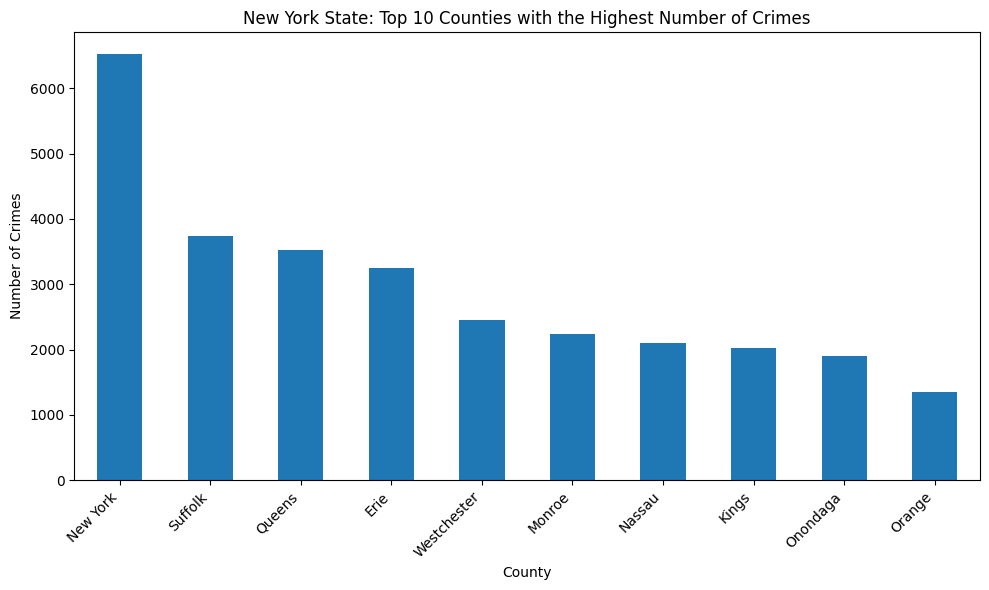

In [21]:
plt.figure(figsize=(10,6))
top10_counties.plot(kind="bar")

plt.title("New York State: Top 10 Counties with the Highest Number of Crimes")
plt.xlabel("County")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [22]:
# top 10 counties with the lowest crime counts
bottom10_counties = county_counts.tail(10)
bottom10_counties

,count
CountyName,
Montgomery,332
Orleans,329
Cortland,313
Warren,307
Putnam,285
Hamilton,284
Fulton,283
Yates,280
Lewis,193


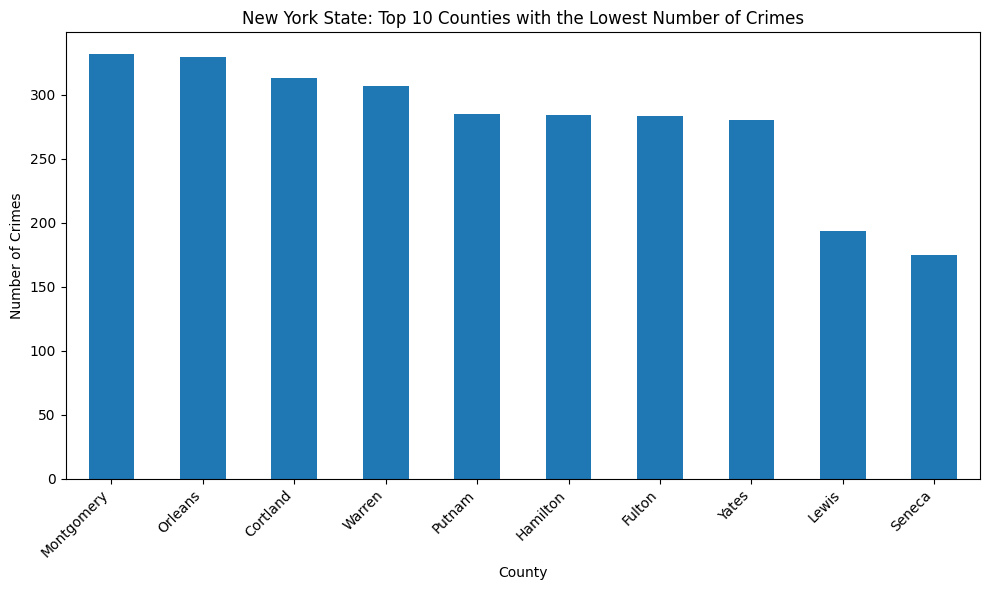

In [23]:
# Bar chart for bottom 10
plt.figure(figsize=(10,6))
bottom10_counties.plot(kind="bar")

plt.title("New York State: Top 10 Counties with the Lowest Number of Crimes")
plt.xlabel("County")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Discussion and Results

## Conclusion

## References

## Appendix